# Stacking individual raster bands into one image  
Listing 9.1 shows how to create a three-band dataset with these same dimensions, and then copy bands 3, 2,
and 1 into it. These three bands correspond to red, green, and blue wavelengths of visible light, respectively, so putting them in this order will result in an RGB (red, green, blue) image that will look much like it would to your own eyes.

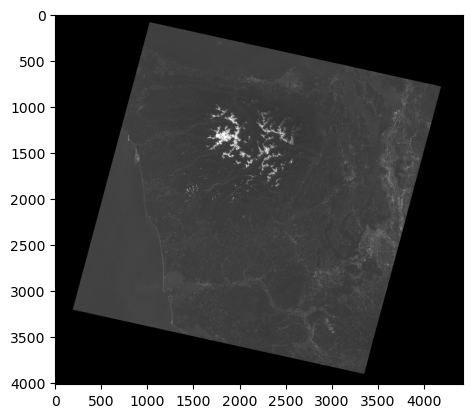

In [20]:
import os 
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
os.chdir(r'E:\Tools\QGIS_tutorial_data\osgeopy-data\Landsat\Washington') 
band1_fn = 'p047r027_7t20000730_z10_nn10.tif' 
band2_fn = 'p047r027_7t20000730_z10_nn20.tif'
band3_fn = 'p047r027_7t20000730_z10_nn30.tif'
# Open the band 1 GeoTIFF
in_ds = gdal.Open(band1_fn)
in_band = in_ds.GetRasterBand(1)

ow = in_band.GetOverview(0)
ow_array = ow.ReadAsArray()
plt.imshow(ow_array, cmap='gray')
plt.show()

# Create a three-band GeoTIFF with same properties as band 1
gtiff_driver = gdal.GetDriverByName('GTiff') 
out_ds = gtiff_driver.Create('nat_color.tif', in_band.XSize, in_band.YSize, 3, in_band.DataType)
out_ds.SetProjection(in_ds.GetProjection())
out_ds.SetGeoTransform(in_ds.GetGeoTransform())

# Copy pixel data from input band to band 3 of output
in_data = in_band.ReadAsArray() 
out_band = out_ds.GetRasterBand(3)
out_band.WriteArray(in_data)

# Copy pixel data from a dataset instead of a band
in_ds = gdal.Open(band2_fn) 
out_band = out_ds.GetRasterBand(2)
out_band.WriteArray(in_ds.ReadAsArray())

out_ds.GetRasterBand(1).WriteArray( gdal.Open(band3_fn).ReadAsArray())

# Compute statistics on each output band
# you compute statistics on each band in your dataset. This isn’t strictly necessary, but it makes it easier for some software to display it nicely. 
out_ds.FlushCache() 
for i in range(1, 4):
    out_ds.GetRasterBand(i).ComputeStatistics(False) 

# Build over views/pyramid layers
# 因为像素值是连续的，因此采用平均插值法而不是最近邻插值法。
out_ds.BuildOverviews('average', [2, 4, 8, 16, 32])

ow_band1 = out_ds.GetRasterBand(1).GetOverview(0)
overview1_array = ow_band1.ReadAsArray()

band1_array = out_ds.GetRasterBand(1).ReadAsArray()

del out_ds